Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      0.70      0.58        10
           1       0.50      0.30      0.37        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.48        20
weighted avg       0.50      0.50      0.48        20

[[7 3]
 [7 3]]


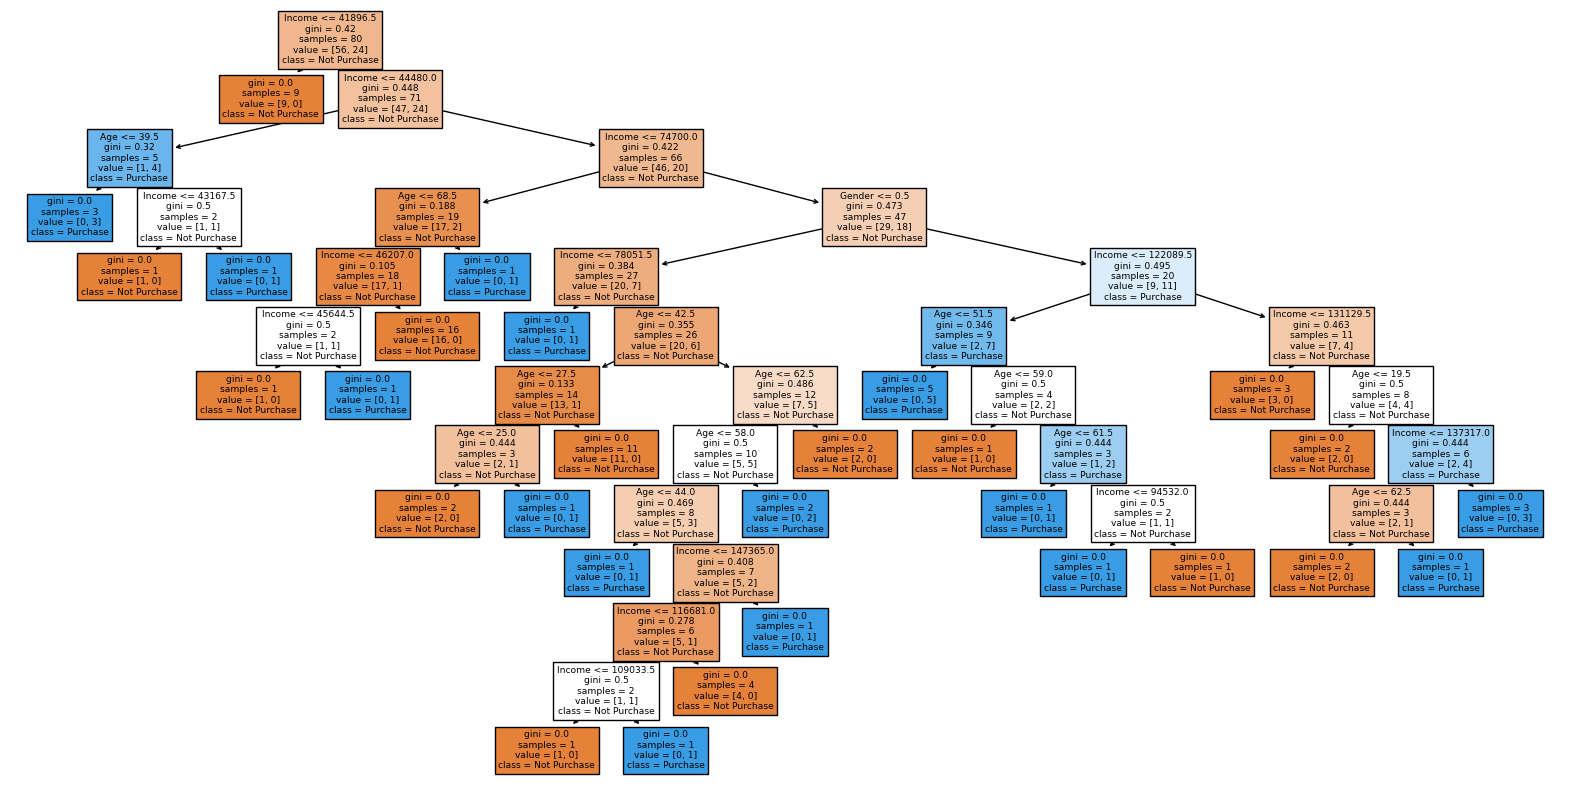

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Load the data
data = pd.read_csv('large-customer_data.csv')

# Data preprocessing
data.fillna(method='ffill', inplace=True)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Split data into features and target
X = data.drop('Purchase', axis=1)
y = data['Purchase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Purchase', 'Purchase'], filled=True)
plt.show()